In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'serif'

In [128]:
df= pd.read_csv("result.csv", names=["Product", "Price", "Year and KM", "Location"])

# remove duplicate
df= df.drop_duplicates()
df.head()

,Product,Price,Year and KM,Location
0,BMW X5,Rp 269.000.000,2010 - 95.000-100.000 km,Kembangan
1,BMW X5,Rp 1.345.000.000,2019 - 30.000-35.000 km,Kelapa Gading
2,BMW X5,Rp 695.000.000,2016 - 35.000-40.000 km,Menteng
3,BMW X5,Rp 1.550.000.000,2020 - 0-5.000 km,Kebon Jeruk
4,BMW X5,Rp 680.000.000,2015 - 40.000-45.000 km,Gambir


In [129]:
# clean price

df["Price"]= df["Price"].str.replace('(\D)', "", regex= True)
df["Price"]= df["Price"].str.strip()
df["Price"]= df["Price"].astype("int64")
df.head()

,Product,Price,Year and KM,Location
0,BMW X5,269000000,2010 - 95.000-100.000 km,Kembangan
1,BMW X5,1345000000,2019 - 30.000-35.000 km,Kelapa Gading
2,BMW X5,695000000,2016 - 35.000-40.000 km,Menteng
3,BMW X5,1550000000,2020 - 0-5.000 km,Kebon Jeruk
4,BMW X5,680000000,2015 - 40.000-45.000 km,Gambir


In [130]:
# clean and split year and km

df["Year"]= df["Year and KM"].str.split("-").str[0]

df["Distance"]= df["Year and KM"].str.split("-").str[-1]
df["Distance"]= df["Distance"].str.replace('(\D)', "", regex= True)

df= df.drop("Year and KM", axis= "columns")

df.head()

,Product,Price,Location,Year,Distance
0,BMW X5,269000000,Kembangan,2010,100000
1,BMW X5,1345000000,Kelapa Gading,2019,35000
2,BMW X5,695000000,Menteng,2016,40000
3,BMW X5,1550000000,Kebon Jeruk,2020,5000
4,BMW X5,680000000,Gambir,2015,45000


In [131]:
len(df)

5891

# Visualization

In [132]:
list_car= ["BMW X5"]
launch_year= 2006

data= df[
    (df["Product"].isin(list_car)) & (df["Year"].astype(int) >= launch_year)
]

data= pd.DataFrame(data.groupby("Year")["Price"].mean())
data= data.reset_index()
data["Age"]= 2022 - data["Year"].astype(int)
data= data.sort_values("Age")
data["Age"]= data["Age"].astype(str)

data["Pct. Diff"]= (data["Price"].pct_change()) * 100
data["Pct. Diff"]= round(data["Pct. Diff"],1)
data["Pct. Diff"]= data["Pct. Diff"].astype(str) + " %"
data["Pct. Diff"]= data["Pct. Diff"].replace({
    "nan %": ""
})

data.head()

,Year,Price,Age,Pct. Diff
15,2022,1.808750e+09,0,
14,2021,1.610571e+09,1,-11.0 %
13,2020,1.480393e+09,2,-8.1 %
12,2019,1.390409e+09,3,-6.1 %
11,2018,8.906250e+08,4,-35.9 %


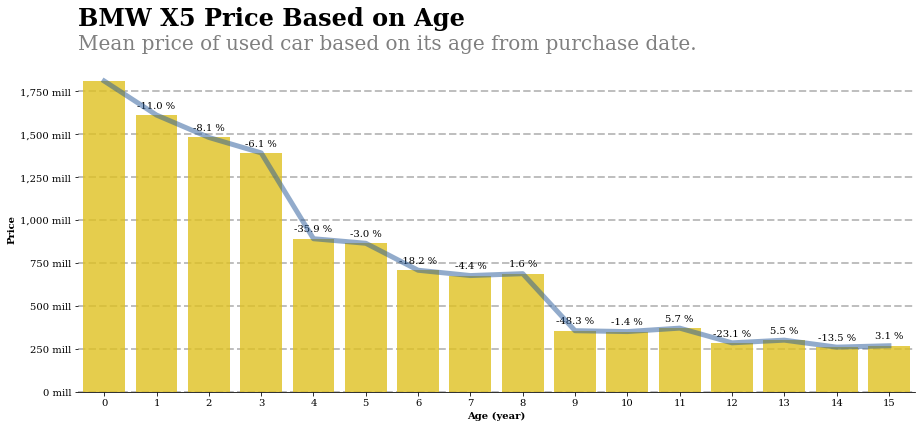

In [133]:
plt.figure(figsize= (15, 6))

ax= sns.lineplot(
    data= data,
    x= "Age",
    y= "Price",
    color= "#265999",
    linewidth= 5,
    alpha= 0.5,
    zorder= 5
)

ax= sns.barplot(
    data= data,
    x= "Age",
    y= "Price",
    color= "#FFD700",
    alpha= 0.8,
    zorder= 4
)


ylabels = ['{:,.0f}'.format(x) + ' mill' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)
ax.set_xlabel("Age (year)", fontweight= "bold")
ax.set_ylabel("Price", fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar_label(ax.containers[0], labels= data["Pct. Diff"], padding = 5)

ax.set_title(
    list_car[0] + " Price Based on Age", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 24,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        # 'horizontalalignment': "right"
        })

plt.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.05, 
    'Mean price of used car based on its age from purchase date.', 
    fontsize= 20, 
    color= "grey")

plt.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)

# plt.savefig("graph_1.png", facecolor= "white", bbox_inches= "tight")
plt.show()

# Create Avg. Price

In [134]:
map= {
    'BMW X5': 'BMW X5',
    'Toyota Avanza': 'Toyota Avanza',
    'Mitsubishi Xpander': 'Mitsubishi Xpander',
    'Toyota Rush': 'Toyota Rush',
    'Toyota Kijang Innova': 'Toyota Innova',
    'Toyota Innova': 'Toyota Innova',
    'Toyota Voxy': 'Toyota Voxy',
    'Toyota Venturer': 'Toyota Venturer',
    'Toyota Kijang': 'Toyota Innova',
    'Toyota mobil-bekas-toyota-Innova': 'Toyota Innova',
    'Honda Brio': 'Honda Brio',
    'Daihatsu Sigra': 'Daihatsu Sigra',
    'Toyota Calya': 'Toyota Calya',
    'Toyota Fortuner': 'Toyota Fortuner',
    'Toyota Raize': 'Toyota Raize',
    'Daihatsu Ayla': 'Daihatsu Ayla'
}

df["Product"]= df["Product"].map(map)

df["Product"].unique()

array(['BMW X5', 'Toyota Avanza', 'Mitsubishi Xpander', 'Toyota Rush',
       'Toyota Innova', 'Toyota Voxy', 'Toyota Venturer', 'Honda Brio',
       'Daihatsu Sigra', 'Toyota Calya', 'Toyota Fortuner',
       'Toyota Raize', 'Daihatsu Ayla', nan], dtype=object)

In [135]:
list_top_ten={ 
    "toyota avanza": 264000000,
    "mitsubishi xpander": 280000000,
    "toyota rush": 290000000, 
    "toyota innova": 392000000,
    "honda brio": 192000000,
    "daihatsu sigra": 151000000,
    "toyota calya": 171000000,
    "toyota fortuner": 581000000,
    "toyota raize": 265000000,
    "daihatsu ayla": 132000000
}

# average price of new cars
avg_price= sum(list(list_top_ten.values())) / len(list(list_top_ten.values())) 

# filter to top 10 cars
data= df[df["Product"].str.lower().isin(list(list_top_ten.keys()))]

data["Product"].nunique()

10

In [136]:
# get mean price
data= pd.DataFrame(data.groupby("Year")["Price"].mean()).reset_index()

# create age column
data["Age"]= 2022 - data["Year"].astype(int)
data= data[(data["Age"] <= 15) & (data["Age"] != 0)]
data= data.sort_values("Age")
data["Age"]= data["Age"].astype(str)
data["Age"]= data["Age"] + " year"

# add new price
data_2 = pd.DataFrame([["New", avg_price, "New"]], columns= data.columns.tolist())
data= pd.concat([data_2, data])

data.head()

,Year,Price,Age
0,New,2.718000e+08,New
18,2021,2.540232e+08,1 year
17,2020,2.443443e+08,2 year
16,2019,2.098046e+08,3 year
15,2018,1.984050e+08,4 year


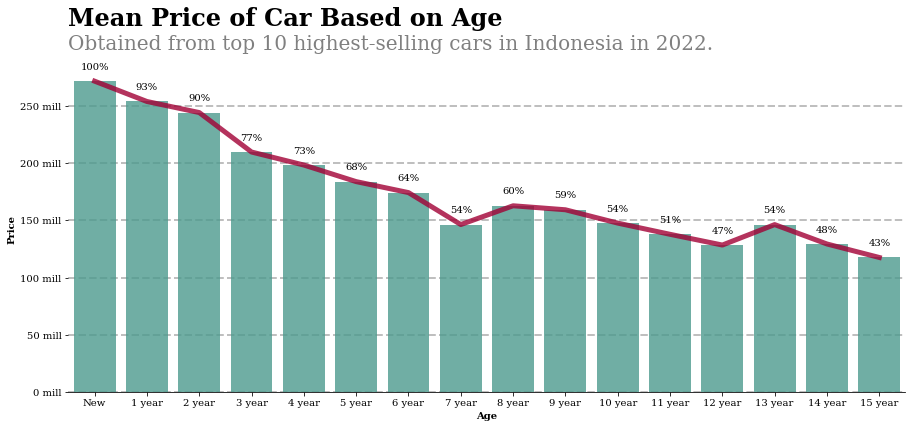

In [149]:
plt.figure(figsize= (15, 6))

ax= sns.lineplot(
    data= data,
    x= "Age",
    y= "Price",
    color= "#A10035",
    linewidth= 5,
    alpha= 0.8,
    zorder= 5
)

ax= sns.barplot(
    data= data,
    x= "Age",
    y= "Price",
    color= "#3FA796",
    alpha= 0.8,
    zorder= 4
)


ylabels = ['{:,.0f}'.format(x) + ' mill' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)
ax.set_xlabel("Age", fontweight= "bold")
ax.set_ylabel("Price", fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar_label(
    ax.containers[0], 
    labels= ['%.0f%%' % e for e in data["Pct. from New"]],
    padding = 10)

ax.set_title(
    "Mean Price of Car Based on Age", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 24,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        # 'horizontalalignment': "right"
        })

plt.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.05, 
    'Obtained from top 10 highest-selling cars in Indonesia in 2022.', 
    fontsize= 20, 
    color= "grey")

plt.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)

# plt.savefig("graph_1.png", facecolor= "white", bbox_inches= "tight", dpi= 200)
plt.show()